<img src="https://cdn.dal.ca/about-dal/history-tradition/logo-seal/_jcr_content/contentPar/staticimage.adaptive.full.high.png/1654529048363.png" alt="Dalogo" width="200"/>

# CSCI 4144 -  Data Mining and Data Warehousing
# Assignment 3 - Clustering and classification

**Due:** 15 March 2024, Anywhere-on-Earth

**Your name:** \[ENTER YOUR NAME HERE\]  
**Your Banner ID:** \[ENTER YOUR BANNER ID HERE\]  
**Your NetID:** \[ENTER YOUR NETID HERE\]

### Assessment

***!This cell is completed only by your marker!***


| #  | Section       |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Section 1     |     | / 8    |           |
| 2  | Section 2     |     | / 10    |           |
| 3  | Bonus         |     | / 3    |           |
| -  | TOTAL         |     | / 18    |           |

In [1]:
# import any libraries here
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# TODO: add any additional libraries here

# your code should run in Python3

## Section 1 - Clustering

In this section, you will compare your own implementation of k-means against scikit-learn's implementation on two small datasets.

Please see scikit-learn's documentation on K-means [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). The answer to your question on how to use it is almost certainly there.

### Datasets

The first dataset, [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit), is a small dataset that could allow a bank to make decisions with regards to providing credit to customers. Every row in this dataset represents a hypothetical person. The column meanings should be self-explanatory from their names, but are not important in this assignment. The ***labels*** are in column `SeriousDlqin2yrs`; all other columns are ***observations***.

The second dataset is the famous [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is commonly used to introduce concepts of clustering and classification. We already saw this dataset in `Lec03.pca.ipynb`, which you have already downloaded and played with extensively, so you are already familiar with it. The ***labels*** are in column `species`; all other columns are ***observations***.

Here is one of the types of flower represented in this dataset: 
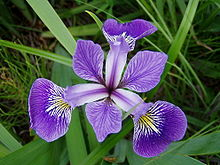
Pretty purple, huh?

You can use `df.head()` to see a sample of the data (including column names), and you can use `df.describe()` to obtain some simple statistics, for Pandas dataframe `df`.

### Tasks

Since the data actually have labels, we will ignore them for now. Using the rest of the data, write one function to assign each data point to its closest centroid, and another to compute new centroids, given data in a cluster. Write another function that combines these in the actual k-means algorithm, and then compare your implementation against scikit-learn

Complete each of the code cells below according to the instructions in the comments. For each section, markers may take away marks for excessively poor quality code, at their discretion.



In [2]:
# 1. load the data in Pandas DataFrames. 
#    Separate each dataset into independent observations/features data (XDeli and XIris) and outcome labels (yDeli and yIris). 
#    You can perform this separation in two lines, for each dataset. Look up the pandas 'drop()' function and indexing if you need to. 

dataDeli = pd.read_csv('https://github.com/davidjohnnn/all_datasets/raw/master/bay/cs-training.csv').drop('Unnamed: 0', axis = 1)
dataIris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv') # the `datasets.load_iris()` fcn is similar but different

dataDeli.dropna(axis=0, inplace=True)
dataIris.dropna(axis=0, inplace=True)

# TODO: your code goes here, below. Be sure to handle potential errors. 
#   
# Separate features and labels for the GiveMeSomeCredit dataset
XDeli = dataDeli.drop('SeriousDlqin2yrs', axis=1)
yDeli = dataDeli['SeriousDlqin2yrs']

# Separate features and labels for the Iris dataset
XIris = dataIris.drop('species', axis=1)
yIris = dataIris['species']

# Check the column names for GiveMeSomeCredit dataset
print("Column names for GiveMeSomeCredit dataset:")
print(XDeli.columns)

# Check the column names for Iris dataset
print("\nColumn names for Iris dataset:")
print(XIris.columns)

Column names for GiveMeSomeCredit dataset:
Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

Column names for Iris dataset:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [3]:
# 2. Find the closest centroids to each datum. Use the sum of squared distances for each column.
#    
def findNearestCentroids(X, centroids):
    # Calculate the sum of squared distances for each datum and each centroid
    distances = np.sum((X.values[:, np.newaxis] - centroids.values) ** 2, axis=2)
    # Find the index of the closest centroid for each datum
    assign = np.argmin(distances, axis=1)
    return assign

# Test the function
centroids = XDeli.sample(n=2)  # Randomly initialize centroids for testing
assign = findNearestCentroids(XDeli, centroids)
print("Assignments:", assign)

Assignments: [1 0 0 ... 0 0 1]


In [4]:
# 3. Find centroids. For each cluster 'i', defined by indices in 'assign', compute the mean value and 
#                    return it in the ith row of 'centroids'
#
def findCentroids(X, idx, k):
    centroids = np.zeros((k, X.shape[1]))  # Initialize centroids array
    for i in range(k):
        # Find indices of points assigned to cluster i
        cluster_indices = np.where(idx == i)[0]
        # Compute mean of points in cluster i
        centroids[i] = np.mean(X.iloc[cluster_indices], axis=0)
    return pd.DataFrame(centroids, columns=X.columns)

# Test the function
centroids = findCentroids(XDeli, assign, 2)
print("Centroids:\n", centroids)

Centroids:
    RevolvingUtilizationOfUnsecuredLines        age  \
0                              3.755685  50.101402   
1                              8.605775  52.789505   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                              0.467846  47.425700    3489.724243   
1                              0.273143   0.315804   10683.916325   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                         7.644361                 0.320169   
1                        10.164454                 0.075324   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                      0.741561                              0.280481   
1                      1.449464                              0.070905   

   NumberOfDependents  
0            0.683855  
1            1.063814  


In [5]:
# 4. Run k-means clustering. Your initial centroids are random (without replacement) rows from 'X'
#
def my_kmeans(X, k, max_iter):
    # Randomly initialize centroids
    centroids = X.sample(n=k, replace=False)
    centroids.index = range(k)  # Reset index for proper indexing
    for _ in range(max_iter):
        # Step 1: Find the closest centroids
        assign = findNearestCentroids(X, centroids)
        # Step 2: Compute new centroids
        new_centroids = findCentroids(X, assign, k)
        # Check for convergence
        if np.array_equal(centroids.values, new_centroids.values):
            break
        centroids = new_centroids
    return centroids, assign

# Test the function
centroids, assign = my_kmeans(XDeli, 2, 100)
print("Centroids:\n", centroids)
print("\nAssignments:", assign)

Centroids:
    RevolvingUtilizationOfUnsecuredLines        age  \
0                              5.900447  51.289181   
1                              0.142895  57.416667   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                              0.381791  26.601431   6.564229e+03   
1                              0.166667   0.003112   1.068865e+06   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                         8.758276                 0.211946   
1                        10.750000                 0.000000   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                        1.0545                              0.187839   
1                        1.2500                              0.083333   

   NumberOfDependents  
0            0.851801  
1            1.166667  

Assignments: [0 0 0 ... 0 0 0]


In [6]:
# 5. Run a very simple experiment. For different values of k (provided), map your centroids to the nearest 
#    centroids from scikit-learn's implementation, and then return the AVERAGE distance between nearest pairs
#    You might have realized that you can use your own findNearestCentroids function, since both arguments
#    are Pandas dataframes
#
#    The output will just be 8 floating point numbers -- one on each line for each value of k, below, on each of the two datasets.
#    Output results for the GiveMeSomeCredit data first, then the results from the Iris dataset
#    
max_iter = 300

# Function to calculate the average distance between nearest pairs of centroids
def average_distance(X, Y):
    distances = pairwise_distances_argmin_min(X, Y)[1]
    return np.mean(distances)

for k in [2, 3, 5, 10]:
    # Select appropriate data
    X = XDeli if k <= 5 else XIris
    y = yDeli if k <= 5 else yIris
    
    # Fit scikit-learn's KMeans
    theirMeans = KMeans(n_clusters=k, random_state=0, max_iter=max_iter, n_init="auto").fit(X)
    
    # Compute my k-means
    myMeans, _ = my_kmeans(X, k, max_iter)
    
    # Calculate the average distance between nearest pairs of centroids
    avg_dist = average_distance(theirMeans.cluster_centers_, myMeans)
    
    # Print the result
    print(avg_dist)

7.475249459177179e-05
492402.37947569136
16.53153119859702
0.2521137329330077


### Assessment for section 1

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Load          |     | / 1     |           |
| 2  | findNearestCentroids()  |     | / 2     |           |
| 3  | findCentroids()  |     | / 2     |           |
| 4  | my_kmeans()          |     | / 2     |           |
| 5  | experiments          |     | / 1     |           |
| -  | TOTAL         |     | / 8      |           |


## Section 2 - Classification

Here, we will actually make use of the labels in our two datasets to do some very simple classification. We will use three builtin classifiers from sklearn, use `fit()` to learn the models on training sets and use `predict()` to make predictions on test sets.

We will use:
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [Support vector machines](https://scikit-learn.org/stable/modules/svm.html)
- [Simple neural networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised)

Complete each of the code cells below according to the instructions in the comments. For each section, markers may take away marks for excessively poor quality code, at their discretion.

In [7]:
# 1. Split each dataset into training and testing sets using sklearn's builtin `train_test_split` function
#    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.
#
#    Each dataset will have four variables: X_train, X_test, y_train, and y_test, for observations X and labels y

# TODO: your code goes here
# For GiveMeSomeCredit dataset
XDeli_train, XDeli_test, yDeli_train, yDeli_test = train_test_split(XDeli, yDeli, test_size=0.2, random_state=42)

# For Iris dataset
XIris_train, XIris_test, yIris_train, yIris_test = train_test_split(XIris, yIris, test_size=0.2, random_state=42)

In [8]:
# 2. Scale the data. Some classifiers can have difficulty if the inputs are not normalized
#    We use sklearn's StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
#    

# For GiveMeSomeCredit dataset
scalerDeli = StandardScaler()
scalerDeli.fit(XDeli_train)
XDeli_train_scaled = scalerDeli.transform(XDeli_train)
XDeli_test_scaled = scalerDeli.transform(XDeli_test)

# For Iris dataset
scalerIris = StandardScaler()
scalerIris.fit(XIris_train)
XIris_train_scaled = scalerIris.transform(XIris_train)
XIris_test_scaled = scalerIris.transform(XIris_test)

# TODO scale only on the respective training data, using scaler.fit(X_train)
# TODO now overwrite both the training and testing data with their scaled versions using  X = scaler.transform(X)


In [9]:
# 3. Train models. Each of the following models uses the fit(X,y) function, which learns a mapping from training observations X 
#                  to their respective labels y, which you already have for each dataset. Use the scaled inputs in all cases.
#                  You will have 6 models -- one for each model type in each of the two datasets.
#
#    For Naive Bayes, use https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
#                     with no parameters
#    For SVM, use https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
#             with kernel="poly", degree=3, gamma="auto", C=1.0
#    For the neural network, use https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#                            with solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1
#

# TODO: your code goes here
# Naive Bayes model for GiveMeSomeCredit dataset
nb_model_deli = GaussianNB()
nb_model_deli.fit(XDeli_train_scaled, yDeli_train)

# SVM model for GiveMeSomeCredit dataset
svm_model_deli = SVC(kernel='poly', degree=3, gamma='auto', C=1.0)
svm_model_deli.fit(XDeli_train_scaled, yDeli_train)

# Neural network model for GiveMeSomeCredit dataset
nn_model_deli = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
nn_model_deli.fit(XDeli_train_scaled, yDeli_train)

# Naive Bayes model for Iris dataset
nb_model_iris = GaussianNB()
nb_model_iris.fit(XIris_train_scaled, yIris_train)

# SVM model for Iris dataset
svm_model_iris = SVC(kernel='poly', degree=3, gamma='auto', C=1.0)
svm_model_iris.fit(XIris_train_scaled, yIris_train)

# Neural network model for Iris dataset
nn_model_iris = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
nn_model_iris.fit(XIris_train_scaled, yIris_train)


/Users/udhayaranjani/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

In [10]:
# 4. Make predictions. Each of the 6 models (that used the fit(X,y) function) also takes a precict(X) function that outputs
#                      predicted labels given data X, which will be our test data split from each dataset
#
#                      For each model, get the predictions on the test set of the respective dataset, and then compare
#                      these predictions against the known true labels (y_test) using the `classification_report` function
#                      (see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
#
#                      The output will just be 6 reports -- one for each classifier, on each of the two datasets.
#                      Output results for the GiveMeSomeCredit data first, then the results from the Iris dataset



# TODO: your code goes here
print("Classification Report for Naive Bayes model (GiveMeSomeCredit dataset):")
print(classification_report(yDeli_test, nb_model_deli.predict(XDeli_test_scaled)))

print("\nClassification Report for SVM model (GiveMeSomeCredit dataset):")
print(classification_report(yDeli_test, svm_model_deli.predict(XDeli_test_scaled)))

print("\nClassification Report for Neural Network model (GiveMeSomeCredit dataset):")
print(classification_report(yDeli_test, nn_model_deli.predict(XDeli_test_scaled)))

# Make predictions and generate classification reports for Iris dataset
print("\nClassification Report for Naive Bayes model (Iris dataset):")
print(classification_report(yIris_test, nb_model_iris.predict(XIris_test_scaled)))

print("\nClassification Report for SVM model (Iris dataset):")
print(classification_report(yIris_test, svm_model_iris.predict(XIris_test_scaled)))

print("\nClassification Report for Neural Network model (Iris dataset):")
print(classification_report(yIris_test, nn_model_iris.predict(XIris_test_scaled)))


Classification Report for Naive Bayes model (GiveMeSomeCredit dataset):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22356
           1       0.40      0.03      0.05      1698

    accuracy                           0.93     24054
   macro avg       0.67      0.51      0.51     24054
weighted avg       0.89      0.93      0.90     24054


Classification Report for SVM model (GiveMeSomeCredit dataset):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22356
           1       0.58      0.01      0.02      1698

    accuracy                           0.93     24054
   macro avg       0.75      0.50      0.49     24054
weighted avg       0.91      0.93      0.90     24054


Classification Report for Neural Network model (GiveMeSomeCredit dataset):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22356
           1       0.59 

5. Add 2-3 sentences interpreting the output from the previous step. At the least, 1) compare overall results across datasets and try to explain why they may be different; 2) compare results across classifiers and try to explain why they may be different. There is no single right answer -- you are meant to show that you can read confusion matrices, that you know the basic theory behind the three classifiers, and that you can assess how differences in the datasets may relate to performance

TODO your observations go here

Across Datasets:

The performance on the GiveMeSomeCredit dataset is notably lower compared to the Iris dataset for all classifiers. This discrepancy could be attributed to the nature of the datasets. The GiveMeSomeCredit dataset likely contains more complex patterns and noise, making it harder for classifiers to learn accurate models compared to the well-defined classes in the Iris dataset.


Across Classifiers:

Naive Bayes and SVM classifiers perform similarly on the GiveMeSomeCredit dataset, with an accuracy of around 93%. However, the SVM classifier outperforms Naive Bayes on the Iris dataset, achieving an accuracy of 97% compared to Naive Bayes' 100%.
The neural network classifier consistently performs better on the Iris dataset compared to the GiveMeSomeCredit dataset. This suggests that neural networks are more adept at capturing the complex relationships present in the Iris dataset, resulting in higher accuracy.
Across both datasets, Naive Bayes tends to have lower precision, recall, and F1-score for the minority class (class 1 in the GiveMeSomeCredit dataset and classes other than setosa in the Iris dataset). This is expected because Naive Bayes assumes independence among features, which might not hold true for these datasets.
SVM shows higher precision, recall, and F1-score for the minority class in the GiveMeSomeCredit dataset compared to Naive Bayes, indicating better performance in correctly identifying instances of the minority class.
The neural network classifier demonstrates relatively balanced precision, recall, and F1-score across both datasets, indicating its ability to generalize well to different classes and datasets.

Overall, it is important to understand the characteristics of the data and the strengths and weaknesses of different classification algorithms when selecting the appropriate model for a particular task.

### Assessment for section 2

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Split       |     | /1      |           |
| 2  | Scale          |     | /1    |           |
| 3  | Train  |     | /3      |           |
| 4  | Test   |     | /3      |           |
| 5  | Interpret |   | /2  | |
| -  | TOTAL         |     | /10     |           |

## Bonus [3 Marks]

- We will give up to 3 bonus marks for innovative work going substantially beyond the minimal requirements and, possibly, for in-class participation. 
- These marks can make up for marks lost in other sections of the assignment, but your overall mark for this assignment cannot exceed 100%. 
- You may decide to pursue any number of tasks of your own design related to this assignment, although you should consult with the instructor or the lead TA before embarking on such exploration, and the value of bonus work is left to the discretion of the markers. 
- Be sure to document your work sufficiently for the markers to understand what you're doing. You can add additional Code or MarkDown cells below, as necessary.
- Certainly, the rest of the assignment takes higher priority. 

Some ideas:

- In Section 1, check to see how well the discovered clusters actually map onto the real labels. That would be cool.
- Run PCA (see Lec03.pca.ipynb) on the data in Section 1 before running k-means and report on the differences in performance for different numbers of principal components used
- Run PCA (see Lec03.pca.ipynb) on the data in Section 2 before running classification and report on the differences in performance for different numbers of principal components used
- Explore the space of classifiers. Try different types of classifiers and different hyper-parameters (e.g., for SVMs, use different kernels; for neural networks, use different numbers of layers or nodes per layer). Report critically on the results you find.


In [11]:
# BONUS Section

# TODO YOUR CODE GOES HERE
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score

def evaluate_clustering_performance(X, y, n_components, n_clusters, max_iter):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Run k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, max_iter=max_iter, n_init="auto")
    kmeans.fit(X_pca)
    
    # Calculate clustering metrics
    ari = adjusted_rand_score(y, kmeans.labels_)
    silhouette = silhouette_score(X_pca, kmeans.labels_)
    
    return ari, silhouette

# Define parameters
n_components_values = [2, 3, 4]  # Try different numbers of principal components
n_clusters = 2  # Number of clusters for k-means
max_iter = 300

# Evaluate clustering performance for GiveMeSomeCredit dataset
print("Evaluation for GiveMeSomeCredit dataset:")
for n_components in n_components_values:
    ari, silhouette = evaluate_clustering_performance(XDeli, yDeli, n_components, n_clusters, max_iter)
    print(f"ARI with {n_components} components: {ari:.4f}")
    print(f"Silhouette score with {n_components} components: {silhouette:.4f}")

# Evaluate clustering performance for Iris dataset
print("\nEvaluation for Iris dataset:")
for n_components in n_components_values:
    ari, silhouette = evaluate_clustering_performance(XIris, yIris, n_components, n_clusters, max_iter)
    print(f"ARI with {n_components} components: {ari:.4f}")
    print(f"Silhouette score with {n_components} components: {silhouette:.4f}")


Evaluation for GiveMeSomeCredit dataset:
ARI with 2 components: -0.0002
Silhouette score with 2 components: 0.9952
ARI with 3 components: -0.0002
Silhouette score with 3 components: 0.9952
ARI with 4 components: -0.0002
Silhouette score with 4 components: 0.9952

Evaluation for Iris dataset:
ARI with 2 components: 0.5399
Silhouette score with 2 components: 0.7057
ARI with 3 components: 0.5399
Silhouette score with 3 components: 0.6869
ARI with 4 components: 0.5399
Silhouette score with 4 components: 0.6810


### Assessment for bonus section

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Bonus         |     | /3      |           |


## Academic Integrity

The following is template information. If there is any ambiguity or contradiction with official Dalhousie University policies, those Dalhousie University policies take effect.

At Dalhousie University, we respect the values of academic integrity: honesty, trust, fairness, responsibility, and respect. As a student, adherence to the values of academic integrity and related policies is a requirement of being part of the academic community at Dalhousie University.

### What does academic integrity mean?

Academic integrity means being honest in the fulfillment of your academic responsibilities thus establishing mutual trust. Fairness is essential to the interactions of the academic community and is achieved through respect for the opinions and ideas of others. Violations of intellectual honesty are oﬀensive to the entire academic community, not just to the individual faculty member and students in whose class an oﬀence occur (See the Dalhousie Secretariat's page on [Academic Integrity](https://www.dal.ca/dept/university_secretariat/academic-integrity.html).

### How can you achieve academic integrity?

- Make sure you understand Dalhousie’s policies on academic integrity.
- Give appropriate credit to the sources used in your assignment such as written or oral work, computer codes/programs, artistic or architectural works, scientific projects,  performances,  web page designs, graphical representations, diagrams, videos, and images. Use [RefWorks](http://www.library.dal.ca/How/RefWorks) to keep track of your research and edit and format bibliographies in the citation style required by the instructor.
- Do not download the work of another from the Internet and submit it as your own.
- Do not submit work that has been completed through collaboration or previously submitted for another assignment without permission from your instructor.
- Do not write an examination or test for someone else.
- Do not falsify data or lab results.

These examples should be considered only as a guide and not an exhaustive list.

### What will happen if an allegation of an academic oﬀence is made against you?

The teaching team is required to report any suspected oﬀence. The full process is outlined in the Discipline flow chart, which can be found [here](https://cdn.dal.ca/content/dam/dalhousie/pdf/dept/university_secretariat/FDPflowchartSEpt2016.pdf) and includes the following:

1. Each Faculty has an Academic Integrity Oﬃcer (AIO) who receives allegations from instructors.
2. The AIO decides whether to proceed with the allegation and you will be notified of the process.
3. If the case proceeds, you will receive an INC (incomplete) grade until the matter is resolved.
4. If you are found guilty of an academic oﬀence, a penalty will be assigned ranging from a warning to a suspension or expulsion from the University and can include a notation on your transcript, failure of the assignment or failure of the course. All penalties are academic in nature.

### Where can you turn for help?

- If you are ever unsure about ANYTHING, contact the teaching team or lead instructor.
- The Academic Integrity website (http://academicintegrity.dal.ca) has links to policies, definitions, online tutorials, tips on citing and paraphrasing.
- The Writing Center provides assistance with proofreading, writing styles, citations.
- Dalhousie Libraries have workshops, online tutorials, citation guides, Assignment Calculator, RefWorks, etc.
- The Dalhousie Student Advocacy Service assists students with academic appeals and student discipline procedures.
- The Senate Oﬃce provides links to a list of Academic Integrity Oﬃcers, discipline flow chart, and Senate Discipline Committee.


## Academic offenses

There is a zero-tolerance policy on academic offenses such as plagiarism or inappropriate collaboration. By submitting your solution for this assignment, you acknowledge that the code submitted is your own work. You also agree that your code may be submitted to plagiarism detection software (such as MOSS) unless you have notified the teaching team otherwise, in writing, before the submission deadline. Any suspected act of plagiarism will be reported to the Faculty’s Academic Integrity Officer in accordance with Dalhousie University’s regulations regarding Academic Integrity. Please note that:

1. The assignments are individual assignments. You can discuss the problems with your friends/classmates, but you need to write your program by yourself. There should not be much similarity in terms of coding. 
2. When you refer to some online resources to complete your program, you need to understand the mechanism, then write your own code. Your code should not be similar to the online resources. In addition, you should cite the sources via comments in your program.

